# CMod Tutorials
This notebook provides code snippets for several of disruption-py's main features on CMod data. The following topics are covered:
- Setup
- Loading disruption parameters from SQL table
- Loading disruption parameters from MDSplus 
- Plotting disruption parameters
- Using the CLI  

Before we begin, here's a basic introduction to the Shot class, the main building block of disruption-py:

The Shot class is a container for disruption data, and is initialized with a shot number. If no data is passed alongside the shot number, the shot number is used to query MDSplus and calculate disruption parameters. Disruption parameters are stored in the data attribute as a pandas dataframe. The timebase of the dataframe, to which all parameters are interpolated is by default the timebase of the default EFIT tree, analysis. However, this can be changed by passing a timebase to the 'times' optional argument or by passing one of several options to the 'timebase_signal' kwarg. The following options are currently availble
- **None**: Use the timebase of the default EFIT tree, analysis
- **flattop**: Use only the flattop region of teh shot 

## 1. Setup
First, we need to import the necessary modules and set up the environment. We will also set the default database to the CMod database.

In [2]:
from MDSplus import *
from disruption_py.database import *
from disruption_py.shots import CModShot
import matplotlib.pyplot as plt
import importlib
import pandas as pd
from IPython.display import display
cmod = create_cmod_handler()

## Grabbing Shot Data from SQL
The SQL database contains two tables called `disruptions` and 'disruption_warning' that contains all of the disruption parameters for each shot(eventually). We can use the `get_shot` and 'get_shots' functions to grab all of the disruption parameters for given shots. The functions return a pandas DataFrame. You can also submit SQL queries directly with 'query' function.

In [4]:
example_shot = cmod.get_shot('1150922001')
example_shots = cmod.get_shots([1150922001, 1150922002])
query_shot = cmod.query('SELECT * FROM shots WHERE shot = 1150922001')
example_shot.data.head()

/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) o

,dbkey,shot,time,time_until_disrupt,ip_error,dip_dt,beta_p,beta_n,li,n_equal_1_normalized,...,Te_peaking,ne_peaking,Te_peaking_ECE,SXR_peaking,kappa_area,I_efc,SXR,H_alpha,Prad_peaking_CVA,commit_hash
0,21457,1150922001,0.06,None,NaN,6.260080e+06,-0.659388,-0.728985,1.882671,0.001876,...,NaN,NaN,NaN,NaN,1.079643,233.430786,None,2.794032,None,None
1,21458,1150922001,0.08,None,NaN,5.876882e+06,-0.226697,-0.308375,1.178092,0.001802,...,1.706439,1.236412,NaN,1.119683,1.168232,848.607849,None,4.332554,None,None
2,21459,1150922001,0.10,None,38626.742188,1.954519e+06,-0.161906,-0.261717,1.082136,0.001470,...,1.867273,1.312129,NaN,0.954083,1.198124,631.827820,None,5.619932,None,None
3,21460,1150922001,0.12,None,71370.562500,1.568255e+06,-0.097981,-0.171079,1.140980,0.001129,...,1.880445,1.254971,NaN,1.425348,1.206939,885.036987,None,5.894803,None,None
4,21461,1150922001,0.14,None,65597.859375,1.568518e+06,-0.034526,-0.059190,1.103502,0.000950,...,1.878983,1.275530,NaN,1.894669,1.283828,1013.405640,None,7.039805,None,None


In [6]:
example_shots[0].data.head()

,dbkey,shot,time,time_until_disrupt,ip_error,dip_dt,beta_p,beta_n,li,n_equal_1_normalized,...,Te_peaking,ne_peaking,Te_peaking_ECE,SXR_peaking,kappa_area,I_efc,SXR,H_alpha,Prad_peaking_CVA,commit_hash
0,21457,1150922001,0.06,None,NaN,6.260080e+06,-0.659388,-0.728985,1.882671,0.001876,...,NaN,NaN,NaN,NaN,1.079643,233.430786,None,2.794032,None,None
1,21458,1150922001,0.08,None,NaN,5.876882e+06,-0.226697,-0.308375,1.178092,0.001802,...,1.706439,1.236412,NaN,1.119683,1.168232,848.607849,None,4.332554,None,None
2,21459,1150922001,0.10,None,38626.742188,1.954519e+06,-0.161906,-0.261717,1.082136,0.001470,...,1.867273,1.312129,NaN,0.954083,1.198124,631.827820,None,5.619932,None,None
3,21460,1150922001,0.12,None,71370.562500,1.568255e+06,-0.097981,-0.171079,1.140980,0.001129,...,1.880445,1.254971,NaN,1.425348,1.206939,885.036987,None,5.894803,None,None
4,21461,1150922001,0.14,None,65597.859375,1.568518e+06,-0.034526,-0.059190,1.103502,0.000950,...,1.878983,1.275530,NaN,1.894669,1.283828,1013.405640,None,7.039805,None,None


## Grabbing Shot Data from MDSplus


In [3]:
local_shot = CModShot(1150922001)

shot 1150922001
HERE5


shot 1150922001


You can choose to populate only specific parameter methods using the populate_methods argument:

In [12]:
local_shot = CModShot(1150922001, populate_methods=["_get_ip_parameters","_get_ohmic_parameters","_get_EFIT_parameters"])
local_shot.data.head()

,beta_n,beta_p,kappa,li,upper_gap,lower_gap,q0,qstar,q95,v_loop_efit,...,ip,dip_dt,dip_smoothed,ip_prog,dipprog_dt,ip_error,p_oh,v_loop,time,shot
0,-0.728985,-0.659388,1.121306,1.882671,16.317188,12.497099,1.043756,7.524931,6.345780,3.997224,...,362075.570106,6.260080e+06,6.049903e+06,NaN,NaN,NaN,7.572598e+04,5.075586,0.06,1150922001
1,-0.308375,-0.226697,1.224313,1.178092,14.130177,12.049963,1.078733,6.259056,5.815024,3.908666,...,482791.882656,5.876708e+06,6.013503e+06,NaN,NaN,NaN,1.031878e+06,5.164196,0.08,1150922001
2,-0.261717,-0.161906,1.250246,1.082136,13.568709,10.995255,1.120945,5.319927,4.939097,3.586226,...,588626.742084,1.954519e+06,4.660650e+06,NaN,NaN,NaN,1.237653e+06,4.257461,0.10,1150922001
3,-0.171079,-0.097981,1.261705,1.140980,13.338100,8.637864,1.126533,5.081687,4.593039,3.225115,...,656106.812500,1.568255e+06,1.066818e+06,589999.986655,1999999.75,66106.825845,2.206009e+06,3.882335,0.12,1150922001
4,-0.059190,-0.034526,1.353420,1.103502,12.758258,7.857955,1.102749,5.276523,4.798643,2.842839,...,685070.421658,1.568469e+06,1.530047e+06,629999.988212,1999999.75,55070.433447,1.349107e+06,2.690682,0.14,1150922001


You can also choose to populate by "tag" which will populate all methods that have that tag:

In [10]:
local_shot = CModShot(1150922001, populate_tags=["all"])

shot 1150922001
HERE5


shot 1150922001


## Editing SQL Tables(DONT DO THIS!)

In [103]:
test_handler.add_column("test_column")
test_handler.remove_column("test_column")

1

In [104]:
test_handler.remove_column("commit_hash")
test_handler.add_column("commit_hash")

ERROR: PROTECTED COLUMN
ERROR: PROTECTED COLUMN


1

## Plotting Disruption Parameters

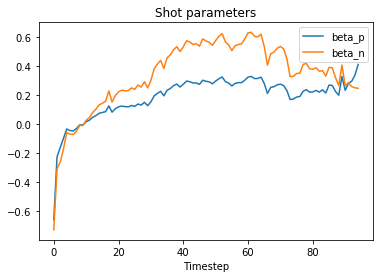

In [16]:
plt.figure()
plt.title('Shot parameters')
plt.plot(local_shot['beta_p'],label='beta_p')
plt.plot(local_shot['beta_n'],label='beta_n')
plt.xlabel('Timestep')
plt.legend()

## Using the CLI

In [24]:
!cd .. && python scripts/generate_datasets.py --tokamak=cmod --data_source=3 --shotlist='scripts/example_shotlist_cmod.txt' --log_level=1

<Logger disruption_py (DEBUG)>
[1150922001, 1120105021, 1140523013, 1160405001, 1090806016, 1090820008]
['aminor', 'n_e', 'ip', 'delta', 'li', 'Wmhd', 'kappa']
[Shot 1150922001]:Failed to populate _get_H98
Traceback (most recent call last):
  File "/home/hmturner/disruption_py/disruption_py/shots/shot.py", line 238, in _init_populate
    parameters.append(method())
  File "/home/hmturner/disruption_py/disruption_py/shots/cmod_shot.py", line 1424, in _get_H98
    return CModShot.get_H98(self._times, tau, t_tau)
TypeError: get_H98() missing 7 required positional arguments: 'n_e', 'ip', 'R0', 'aminor', 'kappa', 'BT', and 'p_input'

DEBUG:disruption_py:Traceback (most recent call last):
  File "/home/hmturner/disruption_py/disruption_py/shots/shot.py", line 238, in _init_populate
    parameters.append(method())
  File "/home/hmturner/disruption_py/disruption_py/shots/cmod_shot.py", line 1424, in _get_H98
    return CModShot.get_H98(self._times, tau, t_tau)
TypeError: get_H98() missing 7 re